# Gruppe - Kilo Daten Analysis von Airbnb (NYC)

IZ-Kürzeln : ulto1011, kuto1023, bagi1011, alum1012

# AirBnb

Airbnb ist ein 2008 im kalifornischen Silicon Valley gegründetes Online-Portal für Buchung und Vermietung von Unterkünften,
ähnlich einem Computerreservierungssystem. Sowohl private als auch gewerbliche Vermieter vermieten ihr "Zuhase" oder einen
Teil davon unter Vermittlung der Unternehmens, jedoch, ohne dass Airbnb rechtliche Verpflichtungen übernimmt. Von der Gründung
im Jahr 2008 bis zum April 2020 wurden nach Angaben des Unternehmens mehr als 500 Millionen Übernachtungen über Airbnb gebucht.

# Bibliotheken importieren 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Dataset Lesen

In [2]:
#Loading the CSV/Dataset
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Nullwerte Überprüfen

In [3]:
df.isnull().sum()
df.to_csv("AB_NYC_2019_CLEAN.csv")

# Zusammenfassung des Datasets

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Datenvorbereitung

Ersetzen von Nullwerten in der Spalte "reviews_per_month" mit 0.

In [6]:
df['reviews_per_month'].fillna(0,inplace = True)

Ersetzen von Nullwerten in der Spalte "name" durch das Zeichen $ und "hostname" durch das Zeichen # im Dataset.

In [7]:
df['name'].fillna("$",inplace=True)
df['host_name'].fillna("#",inplace=True)

Das Löschen der letzten Überprüfung der Spalte, da mehr als 10.000 Datenpunkte Nullwerte enthalten.

In [8]:
df.drop(['last_review'],axis=1,inplace=True)

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Unique neighbourhoods

Dies sind die verschiedenen "unique" Nachbarschaften in den 4 verschiedenen Nachbarschaftsgruppen, darunter Brooklyn, Manhattan, Queens, Staten Islands, Bronx.

In [10]:
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

# Verschiedene Nachbarschaftsgruppen

Folgendes Balkendiagramm zeigt die Anzahl der Airbnbs in den verschiedenen Nachbarschaftsgruppen. Anhand unsere Grafik kann man sich leicht vorstellen, dass die maximale Anzahl der auf Airbnb gelisteten Häuser/Wohnungen in Manhatten sind.

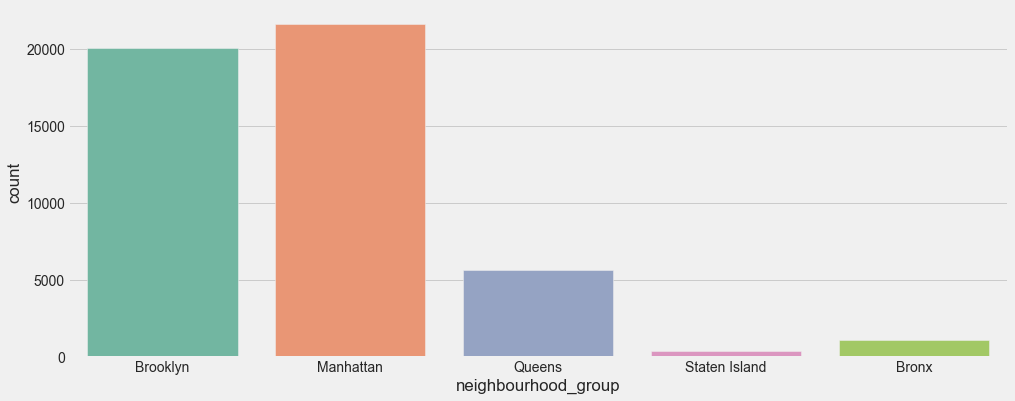

In [11]:
f, ax = plt.subplots(figsize=(15, 6))
ax = sns.countplot(df.neighbourhood_group, palette="Set2")
plt.show()

# Preisverteilung von Airbnb in Manhattan

Die Preisverteilung von Airbnb in Manhattan liegt im Durchschnitt bei 80-490$ pro Nacht je nach Nachbarschaft.

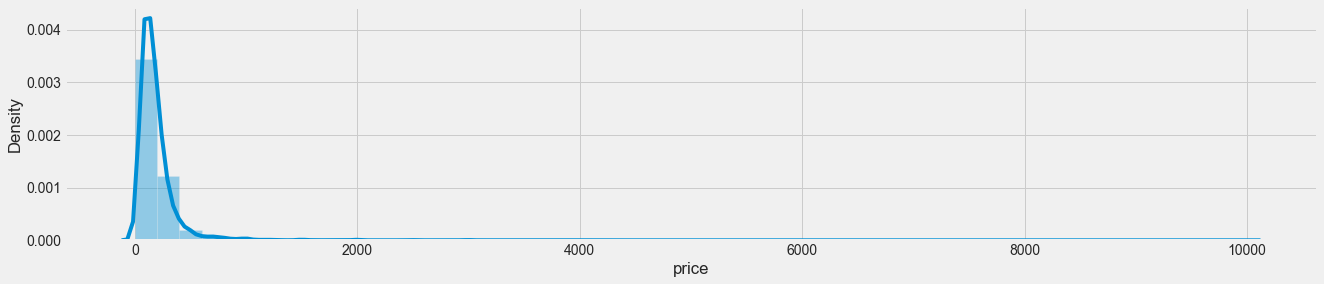

In [12]:
f,ax = plt.subplots(figsize=(20,4))
df1 = df[df.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df1)
plt.show()

# Heatmap (Neighbourhood group)

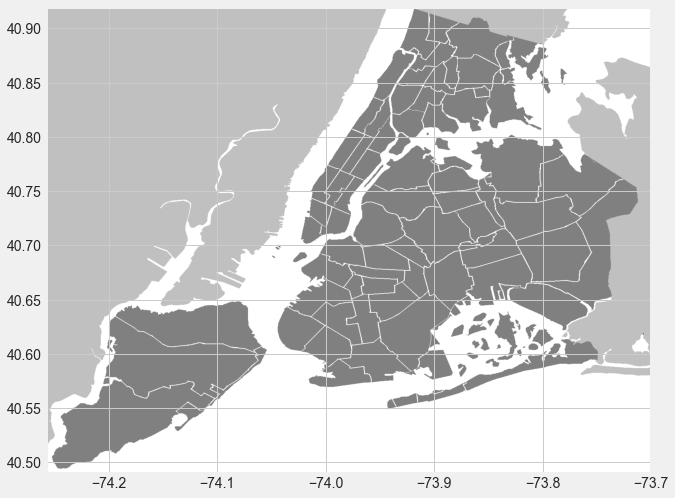

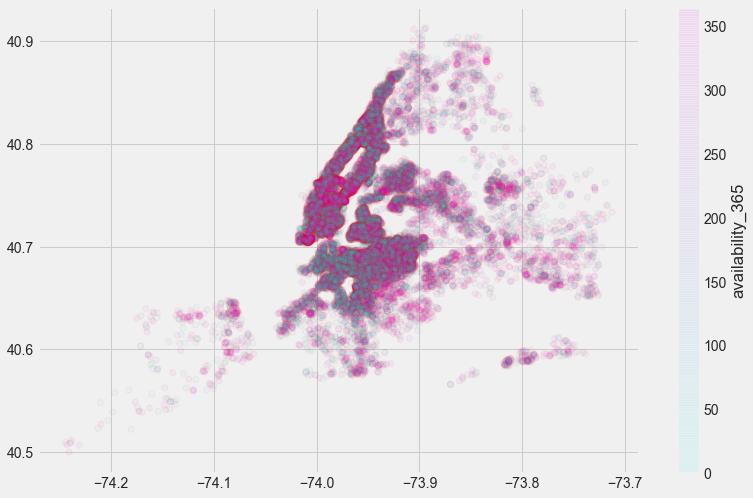

In [14]:
# Initialisieren der Figurengröße
plt.figure(figsize=(12,8))

# Laden des PNG-NYC Bildes (Quelle: Wikipedia)
nyc_img=plt.imread("Neighbourhoods_New_York_City_Map.png")


# Skalierung des Bildes basierend auf dem Breiten und Längengrad max und min für eine korrekte Ausgabe
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax=plt.gca()

#heatmap hinzufügen
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='cool', edgecolor='red', linewidth=1, alpha=0.05)

cbar = plt.colorbar()
cbar.set_label('availability_365')


# Korrelation zwsichen verschiedenen Variablen

<AxesSubplot:>

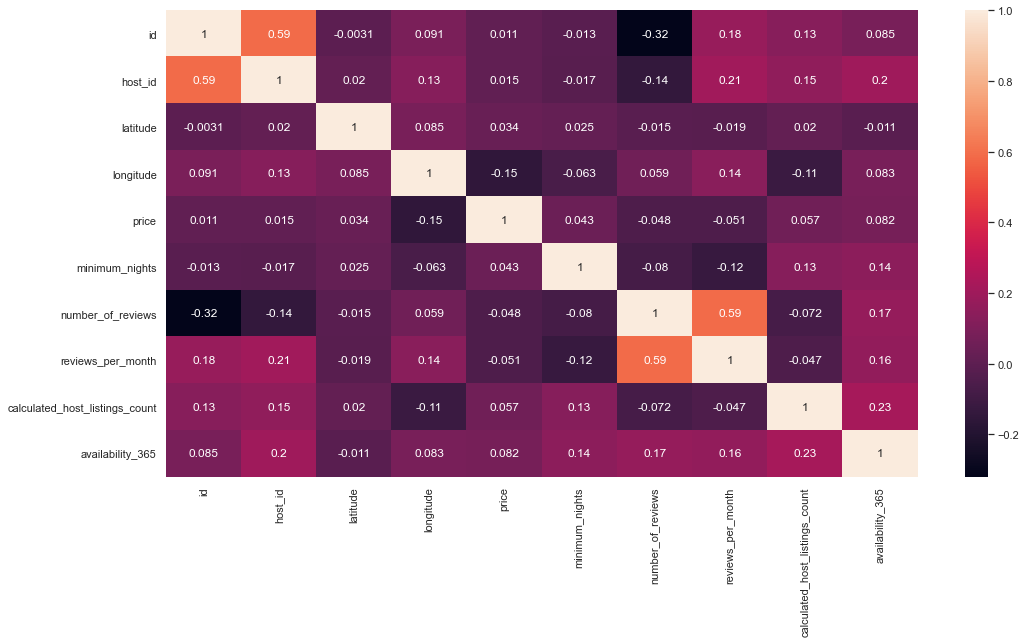

In [15]:
sns.set(font_scale=1)
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

# Top Hosts

Wir zeigen die beliebtesten Hosts

In [17]:
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [18]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

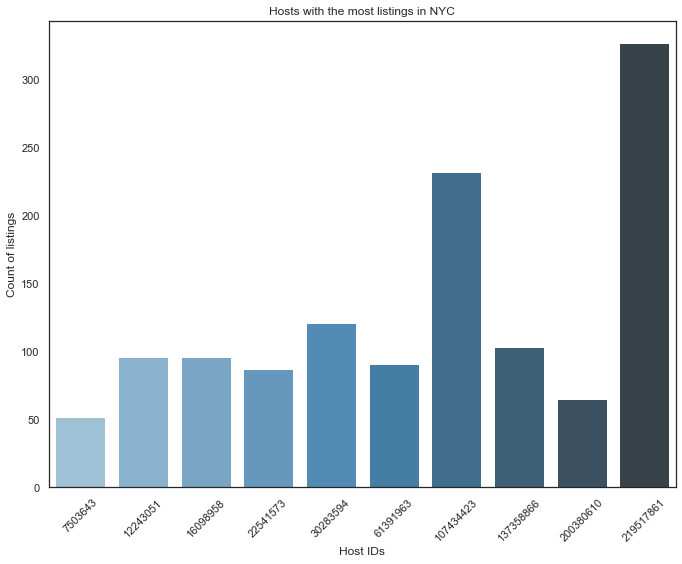

In [41]:
# Initialisieren der Figurengröße
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')


viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

# Top Neighbourhoods

Wir zeigen die beliebtesten Nachbarschaften

In [20]:
top_Neighbourhoods = df.neighbourhood.value_counts().head(15)
top_Neighbourhoods

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

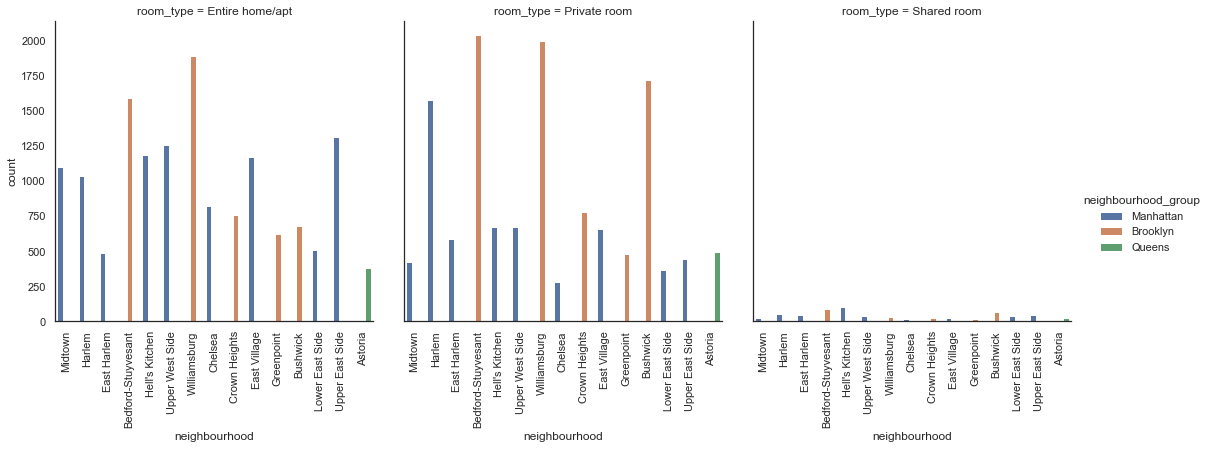

In [21]:
#Ergreifen der Top 15 Neighbourhoods für Sub-Datenrahmen
sub_7=df.loc[df['neighbourhood'].isin(df.neighbourhood.value_counts().head(15).index.tolist())]

#Verwenden von Catplot, um mehrere interessante Attribute zusammen darzustellen, und eine Zählung
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

# Minimum nights for Entire home/apt

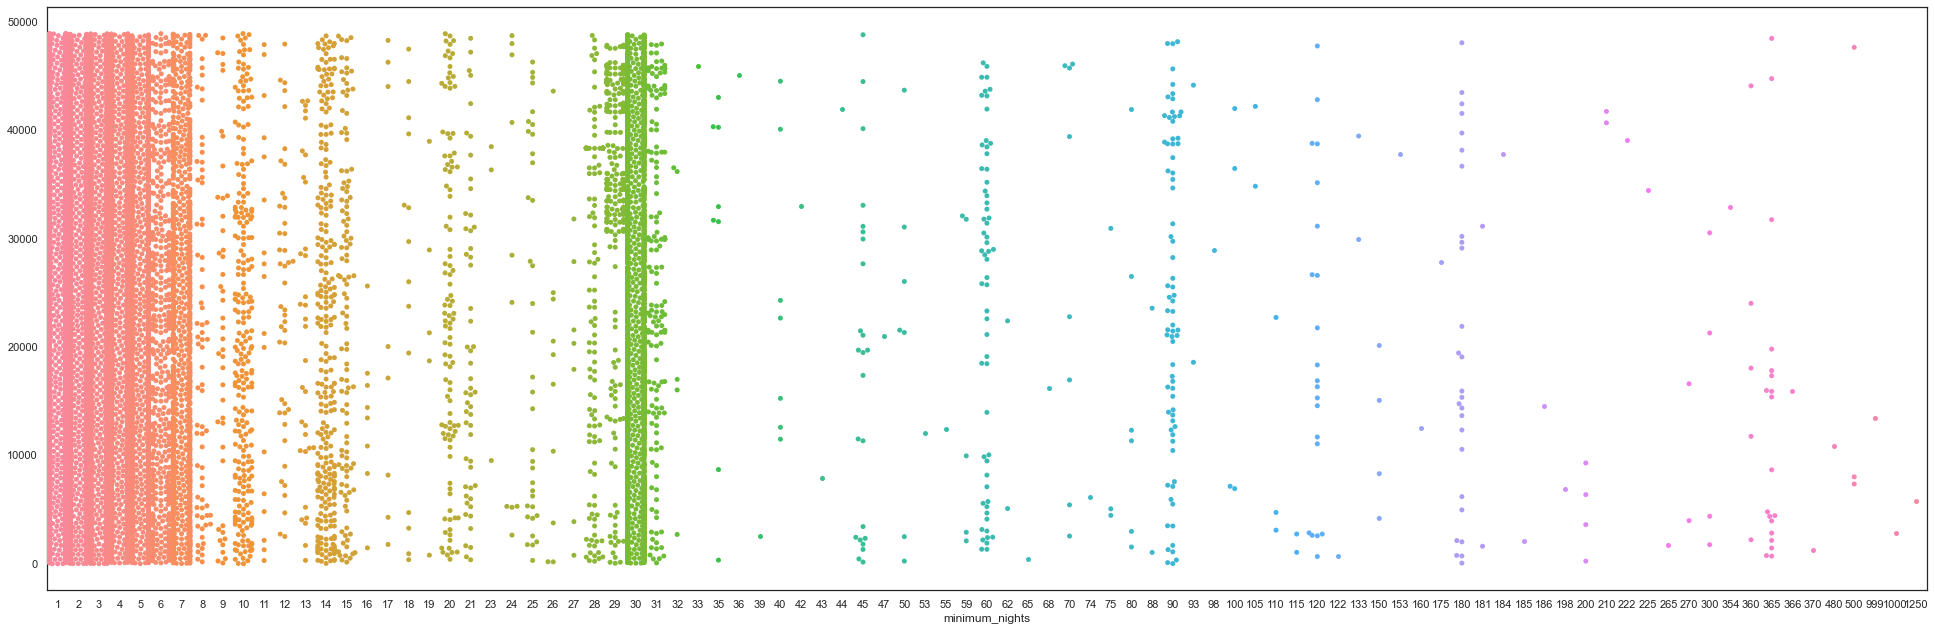

In [40]:
# Die Reseinde bleiben oft im ganzen Haus oder in der Wohnung, wenn sie mit der Familie oder Freunden reisen.
# Im Durchschnitt verbringen die Menschen 1-90 Tage in diesen Wohnungen.

df1 = df[df.room_type=="Entire home/apt"]['minimum_nights']

f,ax = plt.subplots(figsize=(30,10))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()